In [235]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [236]:
df = pd.read_csv('/content/diabetes2.csv')

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


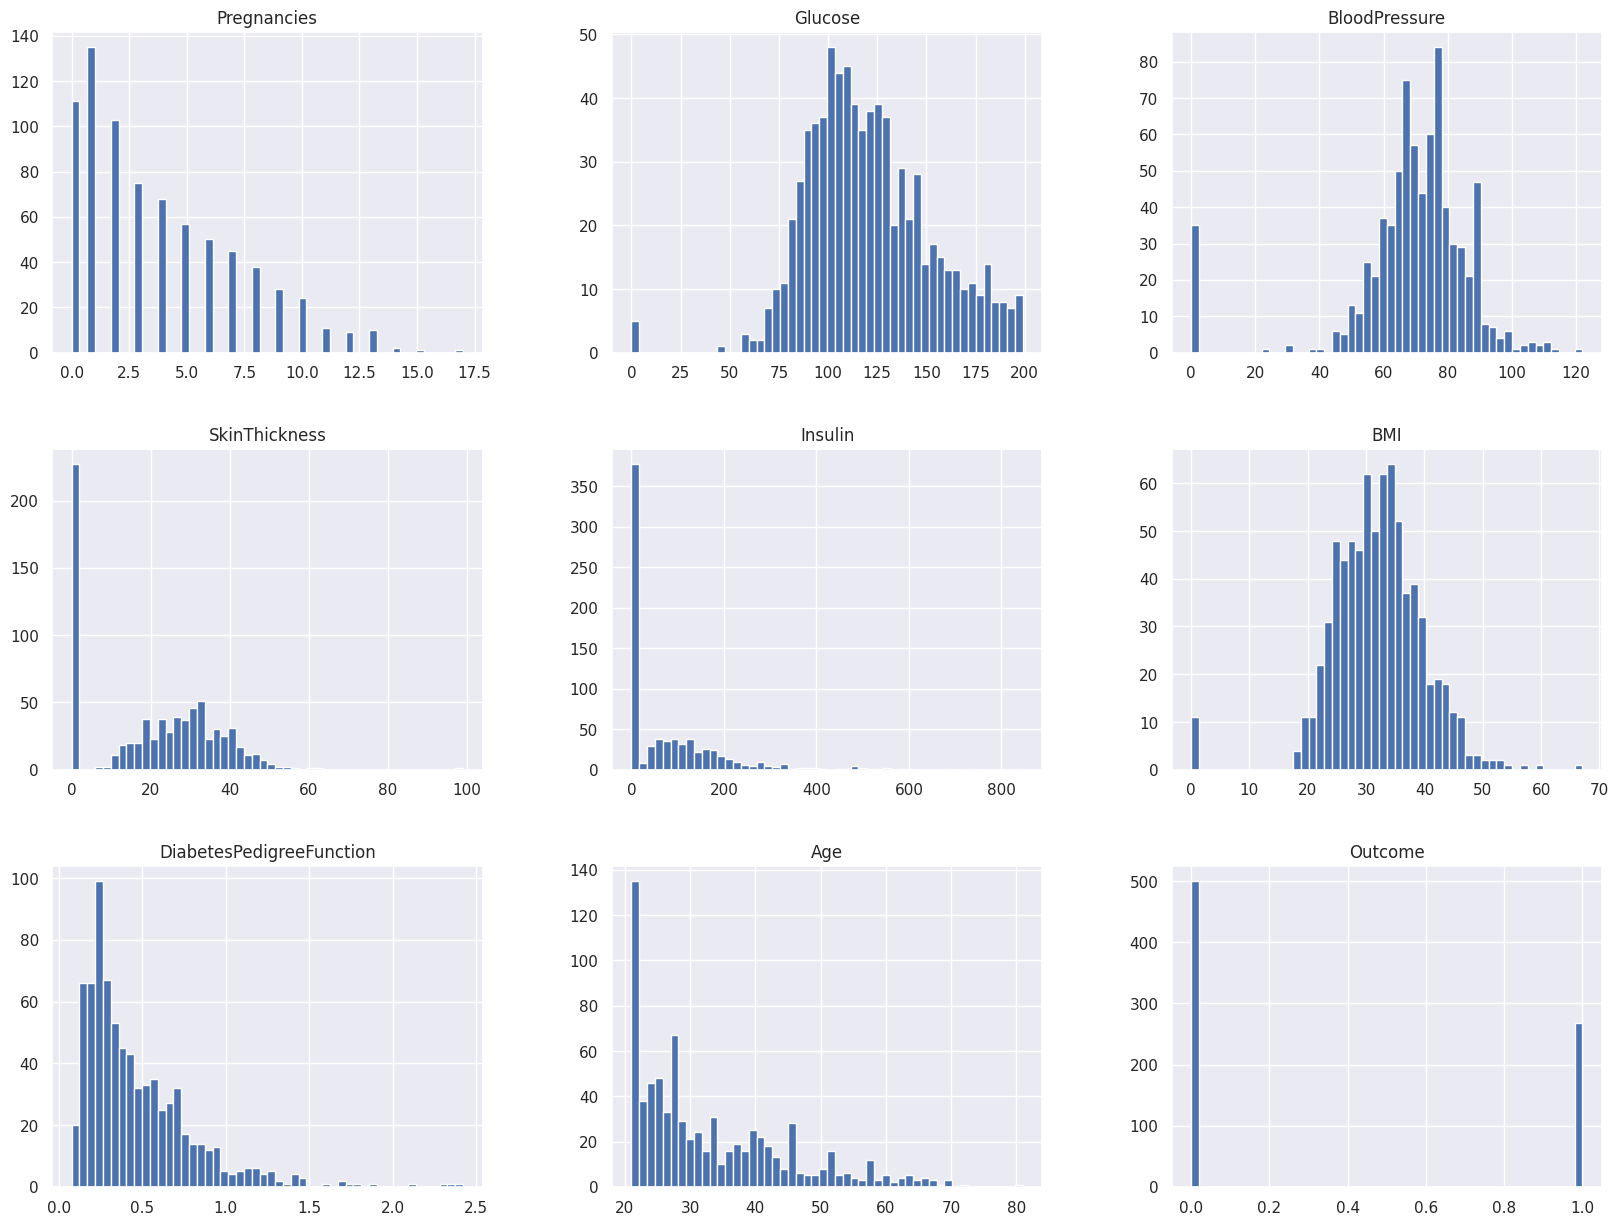

In [238]:
# Plotting histograms to see the frequency distribution

df.hist(bins=50, figsize=(20,15))
plt.show()

In [239]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


There is a problem with this dataset as some values are 0, such as for BP, skin thickness, etc. which cant be zero in real.

1. for numerical values-- we replace 0 values with mean or median
2. for categorical columns-- we use mode
3. column is normally distributed-- mean
4. column is left or right skewed-- median

In [240]:
df['Glucose'].mean()

120.89453125

In [241]:
# Replacing the zero values with mean

df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())

In [242]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

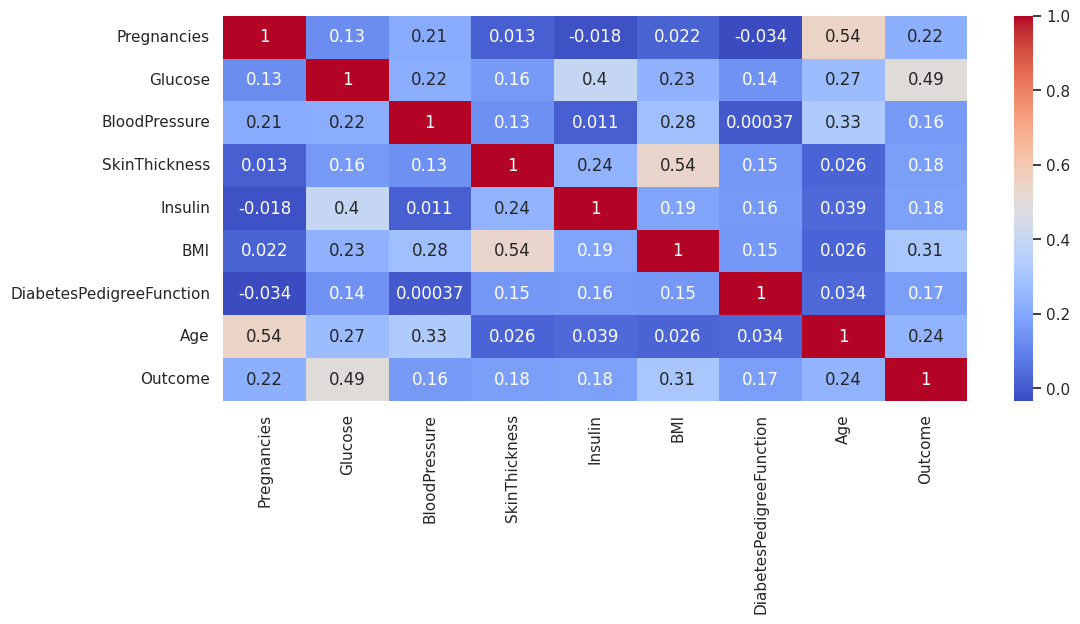

In [243]:
# Plotting heatmap to see the impact of each feature on target variable

sns.set(rc={'figure.figsize':(12, 5)})
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

In [285]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


In [245]:
# Counting the values for both categories

df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<Axes: >

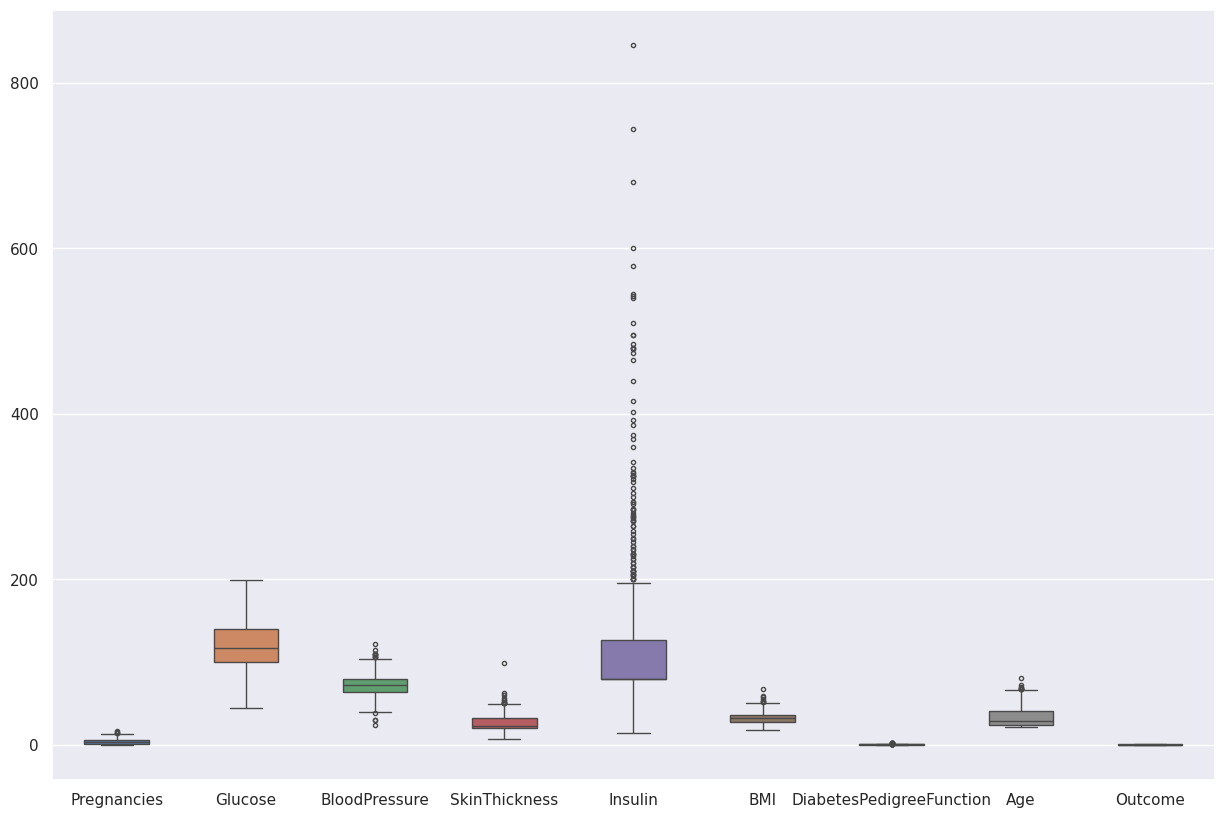

In [246]:
# Plotting the boxplot to check for the outliers

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data = df, ax=ax, width= 0.5, fliersize=3)   # flier means the size of round outliers

Diabetes is directly proportional to insulin level

In [247]:
X = df.drop(columns=['Outcome']) # input variables
y = df['Outcome']  # Output variable

In [248]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [249]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [250]:
X_train_sc=scale.fit_transform(X_train)
X_test_sc=scale.transform(X_test)     #We use same metrics on X_test, that's why we don't fit it to scale, just transform

#We only scale input variables

<Axes: >

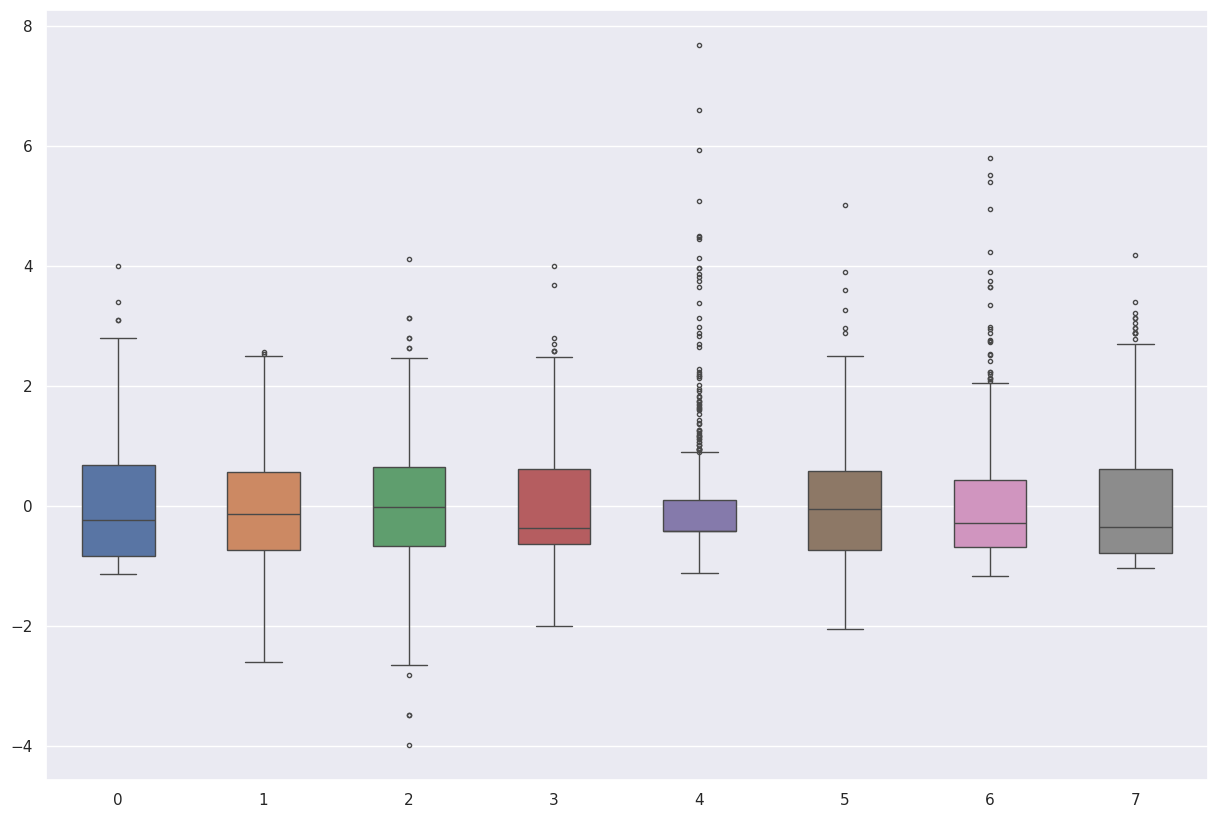

In [251]:
# Boxplots
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data = X_train_sc, ax=ax, width= 0.5, fliersize=3)

In [252]:
from sklearn.linear_model import LogisticRegression

In [253]:
clf=LogisticRegression()

In [254]:
clf.fit(X_train_sc, y_train)

LogisticRegression()

In [255]:
# Extract coefficients
coefficients = clf.coef_[0]

# Get feature names
feature_names = X_train_sc

# Interpret coefficients
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")

[-0.52639686 -1.25806262 -0.24875152 -0.62769163 -0.41602705 -0.05130551
 -0.49073479 -1.03594038]: 0.22192394557985345
[ 1.58804586 -0.32713796  0.81650936 -0.24954818 -0.41602705 -0.5985773
  2.41502991  1.48710085]: 1.124873455030635
[-0.82846011  0.57053938 -2.15757252 -0.79543947 -0.38217149 -0.52642693
  0.54916055 -0.94893896]: -0.16824904793759163
[-1.13052335  1.30198018 -1.82711897 -0.62769163 -0.41602705 -1.50767189
 -0.63929127  2.79212217]: 0.016486272086309893
[ 0.68185612  0.40430284  0.65128259  1.16976915  2.65375484  1.99883583
 -0.68682934  1.13909516]: -0.18588226808913377
[-0.82846011  0.2713136  -0.17485126 -1.45050901 -0.1494524  -0.93046897
  0.00841497 -0.94893896]: 0.731357798671053
[ 0.07772963  0.33780822 -0.24875152 -0.62769163 -0.41602705  0.07963613
 -0.49667705 -0.86193754]: 0.21171527829670617
[ 1.8901091   1.30198018 -0.34007804 -0.35872644  0.1361574  -0.98818927
 -0.42536994  1.22609658]: 0.393002559263861


In [256]:
y_pred=clf.predict(X_test_sc)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [257]:
clf.predict_proba(X_test_sc)

array([[0.74085216, 0.25914784],
       [0.8272927 , 0.1727073 ],
       [0.89038968, 0.10961032],
       [0.84852405, 0.15147595],
       [0.53605745, 0.46394255],
       [0.58071201, 0.41928799],
       [0.98634383, 0.01365617],
       [0.59225165, 0.40774835],
       [0.42899498, 0.57100502],
       [0.22818685, 0.77181315],
       [0.77335102, 0.22664898],
       [0.10157941, 0.89842059],
       [0.64262596, 0.35737404],
       [0.70792494, 0.29207506],
       [0.92133815, 0.07866185],
       [0.61275053, 0.38724947],
       [0.88416717, 0.11583283],
       [0.92906588, 0.07093412],
       [0.25599993, 0.74400007],
       [0.40496577, 0.59503423],
       [0.81355128, 0.18644872],
       [0.92765719, 0.07234281],
       [0.50945271, 0.49054729],
       [0.90698682, 0.09301318],
       [0.44496951, 0.55503049],
       [0.10612143, 0.89387857],
       [0.89077844, 0.10922156],
       [0.97090681, 0.02909319],
       [0.74571181, 0.25428819],
       [0.89181393, 0.10818607],
       [0.

In [258]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve
print('accuracy_score', accuracy_score(y_test,y_pred))
print('precision_score', precision_score(y_test,y_pred))
print('recall_score', recall_score(y_test,y_pred))
print('f1_score', f1_score(y_test,y_pred))
print('classification_report', classification_report(y_test,y_pred))
print('confusion_matrix', confusion_matrix(y_test,y_pred))

accuracy_score 0.7662337662337663
precision_score 0.6862745098039216
recall_score 0.6363636363636364
f1_score 0.660377358490566
classification_report               precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154

confusion_matrix [[83 16]
 [20 35]]


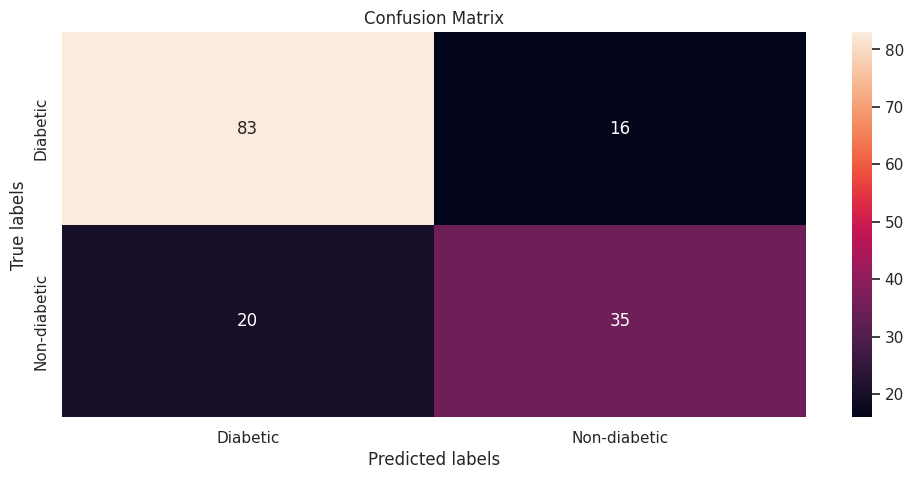

In [259]:
# Plotting confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a bar chart
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt="d")

# Labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Set tick labels for x and y axes
ax.xaxis.set_ticklabels(['Diabetic', 'Non-diabetic'])
ax.yaxis.set_ticklabels(['Diabetic', 'Non-diabetic'])

plt.show()


**ROC-Area Under Curve**



In [260]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

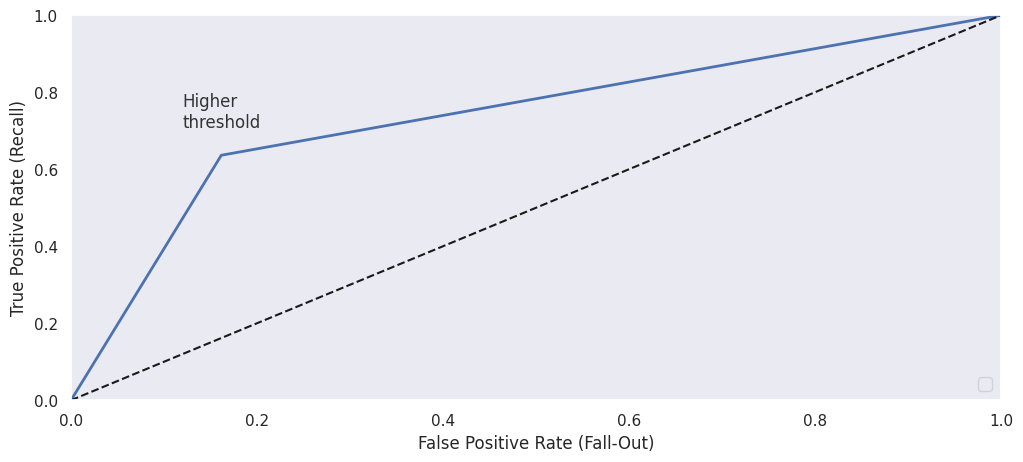

In [261]:
# Plotting ROC-AUC

plt.plot(fpr, tpr, linewidth=2, label=None)

plt.plot([0, 1], [0, 1], 'k--')
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

**SMOT - Synthetically Minority Oversampling Technique**

Oversampling the minority data

Way to oversample is Interpolation

In [262]:
from imblearn.over_sampling import SMOTE

In [263]:
X.shape, y.shape

((768, 8), (768,))

In [264]:
smote=SMOTE(random_state=42)

In [265]:
X.sm ,y.sm=smote.fit_resample(X,y)

<ipython-input-265-81670772baa0>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X.sm ,y.sm=smote.fit_resample(X,y)


In [266]:
X.sm.shape, y.sm.shape

((1000, 8), (1000,))

In [267]:
y.sm.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [268]:
X_train, X_test, y_train, y_test = train_test_split(X.sm, y.sm, test_size=0.2, random_state=42)

In [269]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [270]:
X_train_sc=scale.fit_transform(X_train)
X_test_sc=scale.transform(X_test)

In [271]:
from sklearn.linear_model import LogisticRegression

In [272]:
clf1=LogisticRegression()

In [273]:
clf1.fit(X_train_sc, y_train)

LogisticRegression()

In [274]:
y_pred=clf1.predict(X_test_sc)
y_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1])

In [275]:
clf1.predict_proba(X_test_sc)

array([[0.64416128, 0.35583872],
       [0.85519057, 0.14480943],
       [0.11930539, 0.88069461],
       [0.14098068, 0.85901932],
       [0.73412642, 0.26587358],
       [0.49250249, 0.50749751],
       [0.83706601, 0.16293399],
       [0.89461403, 0.10538597],
       [0.10273443, 0.89726557],
       [0.8401672 , 0.1598328 ],
       [0.22007639, 0.77992361],
       [0.90917185, 0.09082815],
       [0.76511612, 0.23488388],
       [0.12916435, 0.87083565],
       [0.02698025, 0.97301975],
       [0.14764475, 0.85235525],
       [0.29892592, 0.70107408],
       [0.18751834, 0.81248166],
       [0.01941508, 0.98058492],
       [0.084372  , 0.915628  ],
       [0.11815946, 0.88184054],
       [0.92571652, 0.07428348],
       [0.40683524, 0.59316476],
       [0.84469619, 0.15530381],
       [0.93568085, 0.06431915],
       [0.04252913, 0.95747087],
       [0.52521422, 0.47478578],
       [0.57674189, 0.42325811],
       [0.05648779, 0.94351221],
       [0.15471516, 0.84528484],
       [0.

In [276]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
print('accuracy_score', accuracy_score(y_test,y_pred))
print('precision_score', precision_score(y_test,y_pred))
print('recall_score', recall_score(y_test,y_pred))
print('f1_score', f1_score(y_test,y_pred))
print('classification_report', classification_report(y_test,y_pred))
print('confusion_matrix', confusion_matrix(y_test,y_pred))

accuracy_score 0.765
precision_score 0.7547169811320755
recall_score 0.7920792079207921
f1_score 0.7729468599033816
classification_report               precision    recall  f1-score   support

           0       0.78      0.74      0.76        99
           1       0.75      0.79      0.77       101

    accuracy                           0.77       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.77      0.76       200

confusion_matrix [[73 26]
 [21 80]]


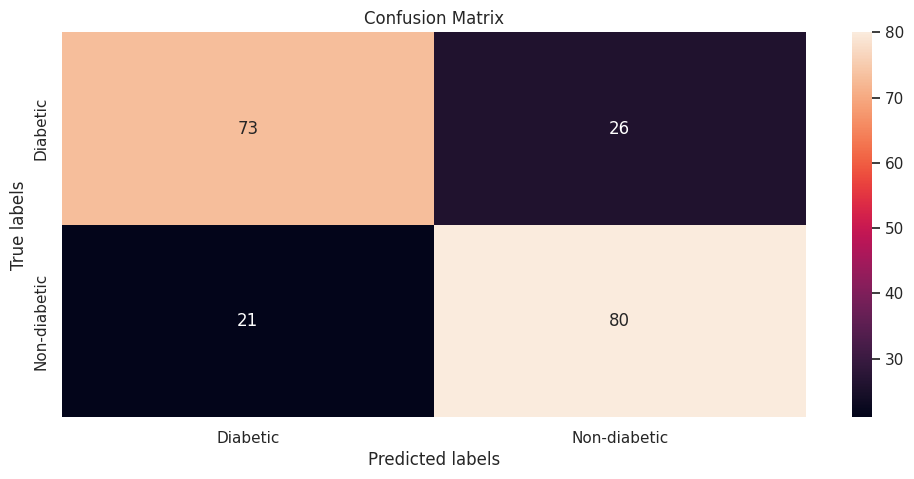

In [277]:
# Plotting confusion matrix after oversampling the data

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Creating a bar chart
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt="d")

# Add labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Set tick labels for x and y axes
ax.xaxis.set_ticklabels(['Diabetic', 'Non-diabetic'])
ax.yaxis.set_ticklabels(['Diabetic', 'Non-diabetic'])

# Show the plot
plt.show()


In [278]:
#Plotting ROC-AUC after oversampling

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

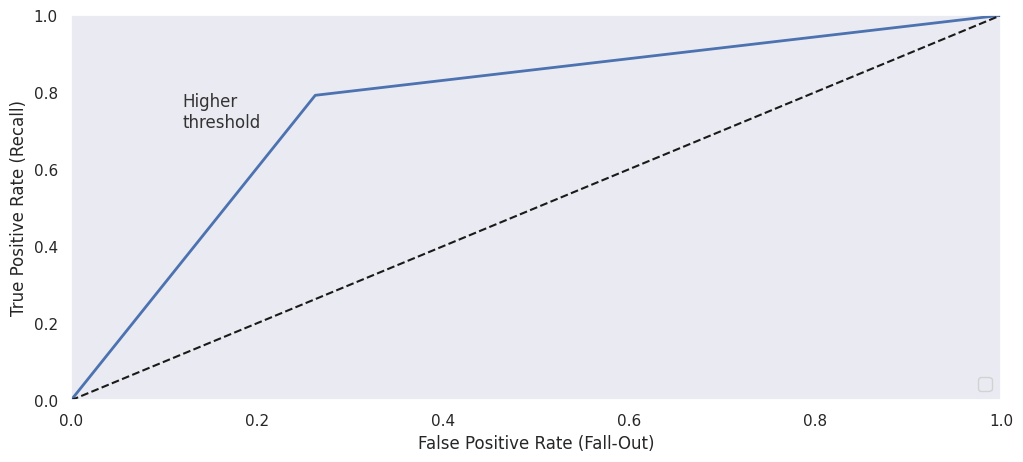

In [279]:
plt.plot(fpr, tpr, linewidth=2, label=None)

plt.plot([0, 1], [0, 1], 'k--')
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

## **Stochastic Gradient Descent**

In [280]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_sc, y_train)

SGDClassifier(random_state=42)

# **Cross-Validation**

In [281]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, confusion_matrix

# Compute cross-validated accuracy
cv_accuracy = cross_val_score(sgd_clf, X_train_sc, y_train, cv=3, scoring='accuracy')
print("Accuracy of 3-folds:", cv_accuracy)

# Get cross-validated predictions
cv_predictions = cross_val_predict(sgd_clf, X_train_sc, y_train, cv=3)

# Compute confusion matrix
confusion_matrix_result = confusion_matrix(y_train, cv_predictions)
print("Confusion Matrix:")
print(confusion_matrix_result)

# Calculate precision
precision_cv = precision_score(y_train, cv_predictions)
print("Cross-Validated Precision:", precision_cv)

# Calculate recall
recall_cv = recall_score(y_train, cv_predictions)
print("Cross-Validated Recall:", recall_cv)

# Calculate F1 score
f1_score_cv = f1_score(y_train, cv_predictions)
print("Cross-Validated F1 Score:", f1_score_cv)


Accuracy of 3-folds: [0.72284644 0.61797753 0.7443609 ]
Confusion Matrix:
[[272 129]
 [115 284]]
Cross-Validated Precision: 0.6876513317191283
Cross-Validated Recall: 0.7117794486215538
Cross-Validated F1 Score: 0.6995073891625616


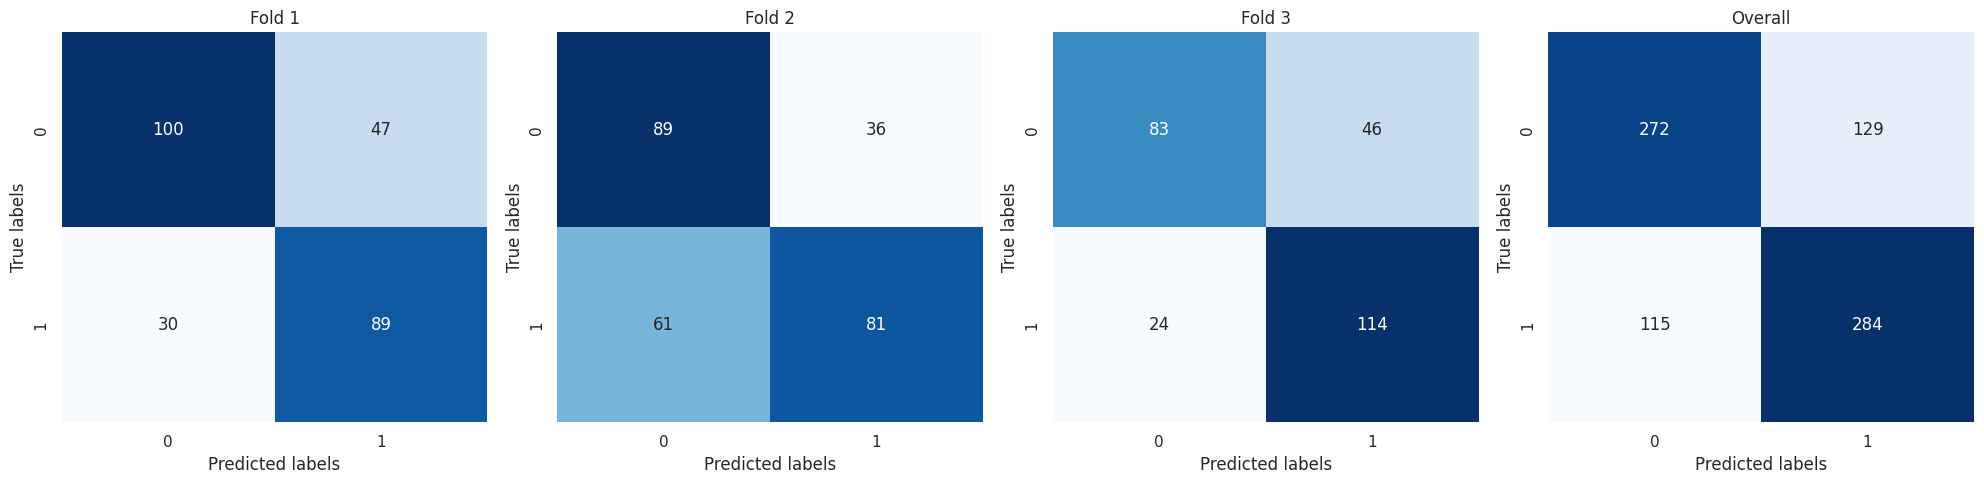

In [282]:
#Plotting the confusion matrices for 3-folds and an overall matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

def plot_cross_val_confusion_matrix(model, X, y, cv=3):
    # Initialize figure
    num_rows = 1
    num_cols = cv + 1  # One column for each fold and one for overall
    plt.figure(figsize=(5 * num_cols, 5 * num_rows))

    # Perform cross-validation predictions
    cv_predictions = cross_val_predict(model, X, y, cv=cv)

    # Compute overall confusion matrix
    overall_cm = confusion_matrix(y, cv_predictions)

    # Plot confusion matrix for each fold
    for i in range(cv):
        fold_predictions = cv_predictions[i*len(y)//cv:(i+1)*len(y)//cv]
        fold_true_labels = y[i*len(y)//cv:(i+1)*len(y)//cv]
        fold_cm = confusion_matrix(fold_true_labels, fold_predictions)

        plt.subplot(num_rows, num_cols, i+1)
        sns.heatmap(fold_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
        plt.title(f'Fold {i+1}')
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')

    # Plot overall confusion matrix
    plt.subplot(num_rows, num_cols, num_cols)
    sns.heatmap(overall_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title('Overall')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')

    plt.tight_layout()
    plt.show()

plot_cross_val_confusion_matrix(sgd_clf, X_train_sc, y_train, cv=3)


In [283]:
mean_accuracy = cv_accuracy.mean()
print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.6950616240976975


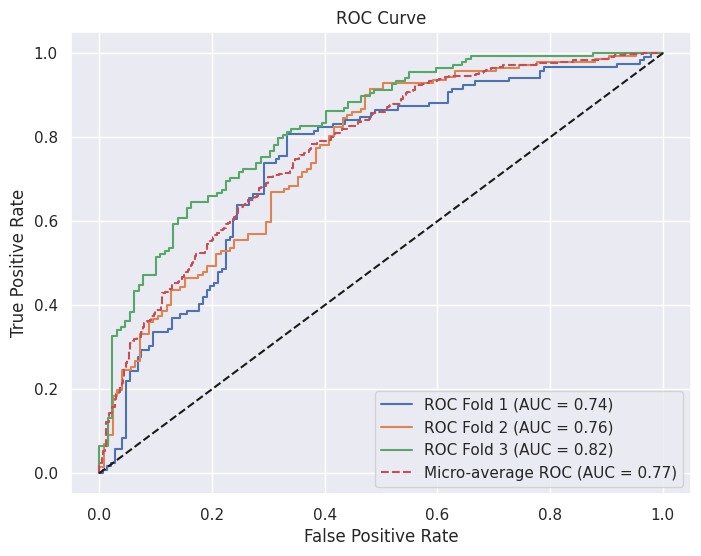

In [284]:
# Plotting ROC-AUC curves for all the 3-folds

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict

# Get cross-validated predicted probabilities
y_scores = cross_val_predict(sgd_clf, X_train_sc, y_train, cv=3, method='decision_function')

# Compute ROC curve for each fold
fpr = []
tpr = []
roc_auc = []

for i in range(3):  # Number of folds
    fpr_fold, tpr_fold, _ = roc_curve(y_train[i*len(y_train)//3:(i+1)*len(y_train)//3],
                                       y_scores[i*len(y_train)//3:(i+1)*len(y_train)//3])
    fpr.append(fpr_fold)
    tpr.append(tpr_fold)
    roc_auc.append(auc(fpr_fold, tpr_fold))

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_train, y_scores)
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curves for each fold
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'ROC Fold {i+1} (AUC = {roc_auc[i]:0.2f})')

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, label=f'Micro-average ROC (AUC = {roc_auc_micro:0.2f})', linestyle='--')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
